# Resarch on the telecom operator for customer churn prediction - Final Project

<div style="border:solid black 1px; padding: 20px">

<p>  
    
* <b>The telecom operator Interconnect would like to be able <font color='red'><u>to forecast their churn of clients</u></font>.</b> 
</p>
<p>
    
* If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options.
</p>
<p>
    
* Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.
</p>
</div>

<div style="border:solid black 1px; padding: 20px">

<div>
<b><font color='red'><u>Interconnect's services</u></font></b>

* <b>Interconnect mainly provides two types of services:</b>
  1. <b>Landline communication.</b> The telephone can be connected to <u>several lines simultaneously</u>.
  2. <b>Internet.</b> The network can be set up via <i>a telephone line (DSL, digital subscriberline)</i> <u>or</u> <i>through a fiber optic cable.</i>

    </div>

<div>   
    
    
* <b>Some<u>other services the company provides</u> include:</b>
    
    * Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
    * A dedicated technical support line (TechSupport)
    * Cloud file storage and data backup (OnlineBackup)
    * TV streaming (StreamingTV) and a movie directory (StreamingMovies)
    


* The clients can choose either <i>a monthly payment</i> <u>or</u> <i>sign a 1- or 2-year contract</i>.


* They can use various payment methods and receive an electronic invoice after a transaction.
    </div>
</div>

<div style="border:solid black 1px; padding: 20px">

    
<b><font color='red'>Data Description</font></b>

* The data consists of files obtained from different sources:
      1. contract.csv — contract information
      2. personal.csv — the client's personal data
      3. internet.csv — information about Internet services
      4. phone.csv — information about telephone services
    
    
* In each file, the column customerID contains a unique code assigned to each client.
    
    
* The contract information is valid as of February 1, 2020.
</div>

######  <font color='red'><u>Initialization - Import relevant libraries</u></font>

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import statistics
import seaborn as sns
from scipy import stats as st
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from IPython import display
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Load Data & Explore

<h3>The Contract Dataset</h3>

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [3]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


<h3>The Personal Dataset</h3>

In [4]:
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [5]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


<h3>The Internet Dataset</h3>

In [6]:
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


<h3>The Phone Dataset</h3>

In [8]:
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [9]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


## Data Preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()

<h3>The Contract Dataset</h3>

<h4>Modifying columns names</h4>

Lowercase the first letter of each variable/attribute for convience purpose only 

In [11]:
df_contract.columns = ['customerID',
 'beginDate',
 'endDate',
 'type',
 'paperlessBilling',
 'paymentMethod',
 'monthlyCharges',
 'totalCharges']

<h4>Data types modification and data values</h4>

Observing data types and date value in order to make the required modificaation if needed

In [12]:
columns_contract = ['endDate','type','paperlessBilling','paymentMethod','totalCharges']
for column in columns_contract:
    print("\n" + column)
    print(df_contract[column].value_counts())


endDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: endDate, dtype: int64

type
Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

paperlessBilling
Yes    4171
No     2872
Name: paperlessBilling, dtype: int64

paymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: paymentMethod, dtype: int64

totalCharges
20.2      11
          11
19.75      9
19.9       8
19.65      8
          ..
1096.6     1
6079       1
1468.9     1
469.85     1
249.95     1
Name: totalCharges, Length: 6531, dtype: int64


<h4>Calculate Tenure Add it to the dataframe</h4>

**Add the column tenure to to the dataset** 
* As we observed above 
  * the endDate column has No values (for no churn yet) and dates values as well(churn dates)
  * and we have info that is the contract information is valid as of 01/02/2020
  * We have the beginDatee column (joining date)
* Filling all the 'No' values of the 'endDate' with 01/02/2020, and subtracting the begin date from the updated endDate column, gives us the tenure
* We will calculate it by days duration

In [13]:
#copying the endDate column in order to do the required modification (it is the target column, not preferable to modify the original one)
df_contract['endDate_temp'] = df_contract['endDate'].copy()
#filling the 'No' values 
df_contract.loc[df_contract['endDate_temp'] == 'No', 'endDate_temp'] = pd.datetime(2020, 2, 1)
#converting the data types
df_contract['endDate_temp'] = pd.to_datetime(df_contract['endDate_temp'])
df_contract['beginDate'] = pd.to_datetime(df_contract['beginDate'])
#calculating the tenure
df_contract['tenure'] = (df_contract['endDate_temp'] - df_contract['beginDate']).dt.days.astype(float)

In [14]:
df_contract['tenure'].value_counts()

31.0      431
2191.0    362
30.0      182
92.0      169
2163.0    164
         ... 
1369.0      2
1948.0      2
1705.0      2
2161.0      1
1917.0      1
Name: tenure, Length: 156, dtype: int64

In [15]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   beginDate         7043 non-null   datetime64[ns]
 2   endDate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessBilling  7043 non-null   object        
 5   paymentMethod     7043 non-null   object        
 6   monthlyCharges    7043 non-null   float64       
 7   totalCharges      7043 non-null   object        
 8   endDate_temp      7043 non-null   datetime64[ns]
 9   tenure            7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 550.4+ KB


In [16]:
df_contract.drop(columns=['endDate_temp'],inplace=True)

<h5>The EndDate Column</h5>

* From the project statement the main task is to predict customer churn by classifying the customers - going to leave/ not going to leave. i.e. Yes/No 
* The target column EndDate contain dates values, date when a cusomer had left the company 
* All of these enties need to be modified so that they contain the word 'Yes'/1 instead of date

In [17]:
df_contract['endDate'] = np.where(df_contract['endDate'] == 'No', 0, 1)

In [18]:
df_contract['endDate'].value_counts()

0    5174
1    1869
Name: endDate, dtype: int64

In [19]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   beginDate         7043 non-null   datetime64[ns]
 2   endDate           7043 non-null   int64         
 3   type              7043 non-null   object        
 4   paperlessBilling  7043 non-null   object        
 5   paymentMethod     7043 non-null   object        
 6   monthlyCharges    7043 non-null   float64       
 7   totalCharges      7043 non-null   object        
 8   tenure            7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 495.3+ KB


**The conversion done correctly**

<h5>Other columns processing</h5>

In [20]:
df_contract['paperlessBilling']= label_encoder.fit_transform(df_contract['paperlessBilling']) 

<h5>Total charges column</h5>

Total charges data type is object, it must be converted to numeric type

In [21]:
df_contract['totalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [22]:
df_contract['totalCharges']=df_contract['totalCharges'].str.replace(',','')
df_contract.loc[df_contract['totalCharges'] == '', 'totalCharges'] = 0.0
df_contract.loc[df_contract['totalCharges'] == ' ', 'totalCharges'] = 0.0
df_contract['totalCharges'] = pd.to_numeric(df_contract['totalCharges'], errors='coerce')

In [23]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   beginDate         7043 non-null   datetime64[ns]
 2   endDate           7043 non-null   int64         
 3   type              7043 non-null   object        
 4   paperlessBilling  7043 non-null   int64         
 5   paymentMethod     7043 non-null   object        
 6   monthlyCharges    7043 non-null   float64       
 7   totalCharges      7043 non-null   float64       
 8   tenure            7043 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 495.3+ KB


### Personal Dataset

<h4>Modifying columns names</h4>

Lowercase the first letter of each variable/attribute for convience purpose only 

In [24]:
df_personal.rename(columns = {'SeniorCitizen':'seniorCitizen', 'Partner':'partner','Dependents':'dependents'}, inplace = True)

<h4>Data types modification and data values</h4>

Observing data types and date value in order to make the required modificaation if needed

In [25]:
for column in df_personal.columns:
    print("\n" + column)
    print(df_personal[column].value_counts())


customerID
9509-MPYOD    1
4283-IVYCI    1
0619-OLYUR    1
1213-NGCUN    1
2773-MADBQ    1
             ..
5296-BFCYD    1
3758-CKOQL    1
5697-GOMBF    1
1125-SNVCK    1
8098-TDCBU    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

seniorCitizen
0    5901
1    1142
Name: seniorCitizen, dtype: int64

partner
No     3641
Yes    3402
Name: partner, dtype: int64

dependents
No     4933
Yes    2110
Name: dependents, dtype: int64


<h5>Changing data types, columns: partner dependents</h5>

* Using label endcoder in order to convert them into categorical columns

In [26]:
df_personal['gender']= label_encoder.fit_transform(df_personal['gender']) 
df_personal['partner']= label_encoder.fit_transform(df_personal['partner']) 
df_personal['dependents']= label_encoder.fit_transform(df_personal['dependents']) 

### Internet Dataset

<h4>Modifying columns names</h4>

Lowercase the first letter of each variable/attribute for convience purpose only 

In [27]:
df_internet.columns = ['customerID',
 'internetService',
 'onlineSecurity',
 'onlineBackup',
 'deviceProtection',
 'techSupport',
 'streamingTV',
 'streamingMovies']

<h4>Data types modification and data values</h4>

Observing data types and date value in order to make the required modificaation if needed

In [28]:
for column in df_internet.columns:
    print("\n" + column)
    print(df_internet[column].value_counts())


customerID
0567-XRHCU    1
7470-DYNOE    1
9172-JITSM    1
0839-JTCUD    1
5980-BDHPY    1
             ..
9207-ZPANB    1
5727-MYATE    1
9477-LGWQI    1
6627-CFOSN    1
6296-DDOOR    1
Name: customerID, Length: 5517, dtype: int64

internetService
Fiber optic    3096
DSL            2421
Name: internetService, dtype: int64

onlineSecurity
No     3498
Yes    2019
Name: onlineSecurity, dtype: int64

onlineBackup
No     3088
Yes    2429
Name: onlineBackup, dtype: int64

deviceProtection
No     3095
Yes    2422
Name: deviceProtection, dtype: int64

techSupport
No     3473
Yes    2044
Name: techSupport, dtype: int64

streamingTV
No     2810
Yes    2707
Name: streamingTV, dtype: int64

streamingMovies
No     2785
Yes    2732
Name: streamingMovies, dtype: int64


### Phone Dataset

<h4>Modifying columns names</h4>

Lowercase the first letter of each variable/attribute for convience purpose only 

In [29]:
df_phone.rename(columns = {'MultipleLines':'multipleLines'}, inplace = True)

<h4>Data types modification and data values</h4>

Observing data types and date value in order to make the required modificaation if needed

In [30]:
for column in df_phone.columns:
    print("\n" + column)
    print(df_phone[column].value_counts())


customerID
9509-MPYOD    1
7251-LJBQN    1
3066-RRJIO    1
3721-CNEYS    1
0619-OLYUR    1
             ..
6258-NGCNG    1
1431-AIDJQ    1
1452-XRSJV    1
0621-TSSMU    1
8098-TDCBU    1
Name: customerID, Length: 6361, dtype: int64

multipleLines
No     3390
Yes    2971
Name: multipleLines, dtype: int64


<h3>Merging tabels</h3>

**Merging all the four tables to one table, in order to work with data and do model evaluation**

In [31]:
# merging the contract and personal dataframes
df_merge_1 = pd.merge(df_contract,df_personal,on=['customerID'],how='outer')

In [32]:
df_merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   beginDate         7043 non-null   datetime64[ns]
 2   endDate           7043 non-null   int64         
 3   type              7043 non-null   object        
 4   paperlessBilling  7043 non-null   int64         
 5   paymentMethod     7043 non-null   object        
 6   monthlyCharges    7043 non-null   float64       
 7   totalCharges      7043 non-null   float64       
 8   tenure            7043 non-null   float64       
 9   gender            7043 non-null   int64         
 10  seniorCitizen     7043 non-null   int64         
 11  partner           7043 non-null   int64         
 12  dependents        7043 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 770.3+ KB


In [33]:
# merging the table above with the internet dataframe
df_merge_2 = pd.merge(df_merge_1,df_internet,on=['customerID'],how='outer')

In [34]:
df_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   beginDate         7043 non-null   datetime64[ns]
 2   endDate           7043 non-null   int64         
 3   type              7043 non-null   object        
 4   paperlessBilling  7043 non-null   int64         
 5   paymentMethod     7043 non-null   object        
 6   monthlyCharges    7043 non-null   float64       
 7   totalCharges      7043 non-null   float64       
 8   tenure            7043 non-null   float64       
 9   gender            7043 non-null   int64         
 10  seniorCitizen     7043 non-null   int64         
 11  partner           7043 non-null   int64         
 12  dependents        7043 non-null   int64         
 13  internetService   5517 non-null   object        
 14  onlineSecurity    5517 n

In [35]:
# merging the table above with the phone dataframe
df_final = pd.merge(df_merge_2,df_phone,on=['customerID'],how='outer')

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   beginDate         7043 non-null   datetime64[ns]
 2   endDate           7043 non-null   int64         
 3   type              7043 non-null   object        
 4   paperlessBilling  7043 non-null   int64         
 5   paymentMethod     7043 non-null   object        
 6   monthlyCharges    7043 non-null   float64       
 7   totalCharges      7043 non-null   float64       
 8   tenure            7043 non-null   float64       
 9   gender            7043 non-null   int64         
 10  seniorCitizen     7043 non-null   int64         
 11  partner           7043 non-null   int64         
 12  dependents        7043 non-null   int64         
 13  internetService   5517 non-null   object        
 14  onlineSecurity    5517 n

In [37]:
df_final['totalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalCharges, dtype: float64

In [38]:
df_final['monthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlyCharges, dtype: float64

In [39]:
totalBelow18=df_final.query('totalCharges <= 18')
print(totalBelow18.shape[0])
print(totalBelow18[['totalCharges','tenure']])

11
      totalCharges  tenure
488            0.0     0.0
753            0.0     0.0
936            0.0     0.0
1082           0.0     0.0
1340           0.0     0.0
3331           0.0     0.0
3826           0.0     0.0
4380           0.0     0.0
5218           0.0     0.0
6670           0.0     0.0
6754           0.0     0.0


**All of these values are for new customers who joined the company on 01/02/2020 which is the last month the contract information valid for. removing those values woudld be a better idea, they are considered outliers keeping them can distort the data analysis**

In [40]:
df_final = df_final[df_final['totalCharges'] > 18]

### Conclusion

**For each column** 
1.  We change all the names of the columns, so that each attribute it's first letter is a lower case and that is for convenience purposes only 
2. We observed the data types and data values for each attribute on each table

* For the Contract Dataframe:
  * Add 'Tenure' column to the contract dataframe
  * Convert the type of beginDate column into datetime type 
  * endDate the target column converted to category type: each entry with date value was replaced with 1(customer unsubscribed), and each entry with 'No' value was replaced with 0 (active subscription)
  * Categorical types of yes/no were converted to categorcial with the One Label Encoding
* For the Personal Dataframes
  * Categorical types of yes/no were converted to categorcial with the One Label Encoding
* For the internet and phone dataframes, did not use one label encoding because the attributes are not binary, there can be:
   1. subscribers to the main service who did not subscribed to the subservice 
   2. subscribers who are subscribed to the sub service 
   3. not subscribers at all to the main service itself 
* We merged all of the four dataframes into one single dataframe, After the merge we got 
  * a dataset of 21 one columns
  * Most of the attributes are of describe category attributes(Yes/No - 0/1)
  * a dataset with null values, and that is because the other tables have data about services that the customer can subscribe to 
     * actually they are not NaN those customer are not subscribed to the whole internet service or the phone service, and obviously they are are not subscribed to the subservices of the phone and interent 
  * For the total charges column we observed that there are outliers(zero charges), which is not reasonable because there is a monthly charge for each customer
     * those customers just joined the company with tenure 
     * decided to remove them in order to keep the analysis without any distort

## EDA

### Data Visualization - Plots

<AxesSubplot:ylabel='Frequency'>

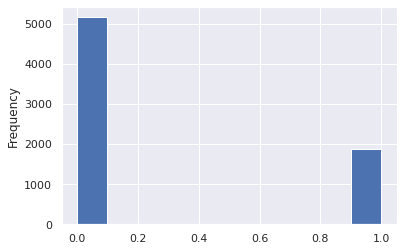

In [41]:
df_final['endDate'].plot(kind = 'hist')

* The ratio of cutomers who did not churn is significantly higher than those who did churn 
* the class seems imbalanced 

<AxesSubplot:ylabel='Frequency'>

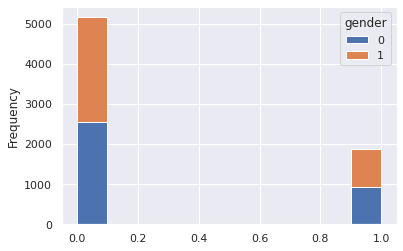

In [42]:
df_final.pivot(columns='gender').endDate.plot(kind = 'hist', stacked=True)

* From the graph we see that the gender does not have effect on customer churn
* The ratios very close to each other

<AxesSubplot:ylabel='Frequency'>

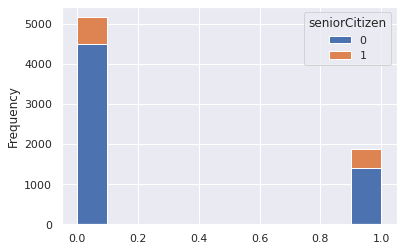

In [43]:
df_final.pivot(columns='seniorCitizen').endDate.plot(kind = 'hist', stacked=True)

* Senior citizen churn ratio is almost three times larger than this of the young ones

<AxesSubplot:ylabel='Frequency'>

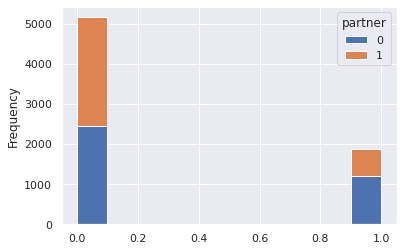

In [44]:
df_final.pivot(columns='partner').endDate.plot(kind = 'hist', stacked=True)

* Customers with partner tend to churn twice more than those without one

<AxesSubplot:ylabel='Frequency'>

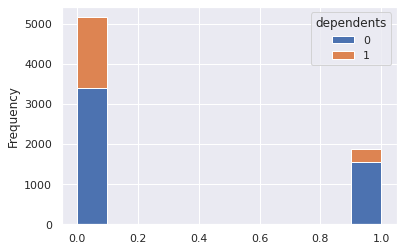

In [45]:
df_final.pivot(columns='dependents').endDate.plot(kind = 'hist', stacked=True)

* Customers without dependents churn ratio is much higher than those with dependents

<AxesSubplot:ylabel='Frequency'>

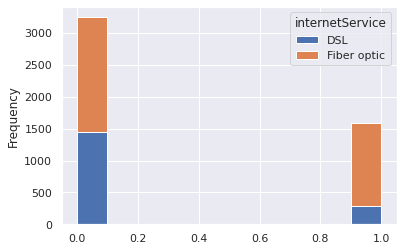

In [46]:
df_final.dropna().pivot(columns='internetService').endDate.plot(kind = 'hist', stacked=True)

* Customer with the DSL service churn ratio is signficantly lower than those with the Fiber optics

<AxesSubplot:ylabel='Frequency'>

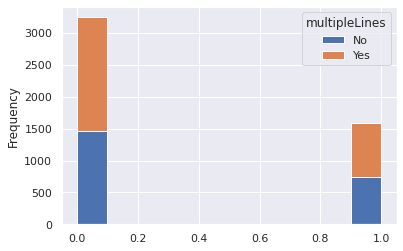

In [47]:
df_final.dropna().pivot(columns='multipleLines').endDate.plot(kind = 'hist', stacked=True)

* The ratio of customer with and without multiple lines are almost the same, it can be considered that this attribute does not has effect on customer churn 

<AxesSubplot:ylabel='Frequency'>

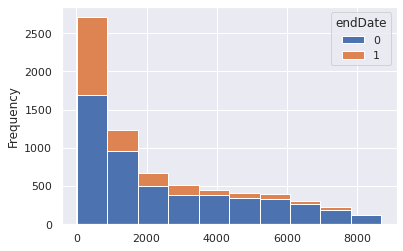

In [48]:
df_final.pivot(columns='endDate').totalCharges.plot(kind = 'hist', stacked=True)

* We can see that as the total charges increase the number of customer who stayed in the company are decreasing
* The total charges seems to effect customer churn and in reality it goes without saying

<AxesSubplot:ylabel='Frequency'>

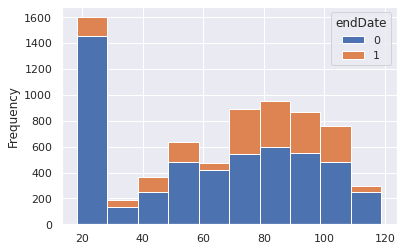

In [49]:
df_final.pivot(columns='endDate').monthlyCharges.plot(kind = 'hist', stacked=True)

* From the graph the relationship of the churn with the monthly charge can be confusing somehow
* Customers who were charged between 60-70 churn less than those who were charged between 40-60 
* Customers who were charged between 20-30 churn less than those who were charged between 20-30 
* Naturally people prefer to pay less and look for attractive offers (in terms of price)
* We can see that the highest customers frequency belong to the first group who pay monthly between 20-30, it is proof of the statement above

<AxesSubplot:ylabel='Frequency'>

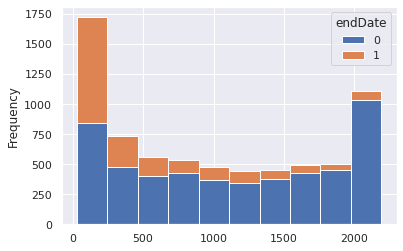

In [50]:
df_final.pivot(columns='endDate').tenure.plot(kind = 'hist', stacked=True)

* We can see that as the tenure period is longer the churn ratio drops, the opposite is true
* There is acute decrease of the frequency of customers between those with a tenure of up to 250 and those with tenure between 250-500
* There is acute increase of the frequency of customers between those with tenure of 1750-2000 and thoose with tenure between 2000-2250

### Data correlation

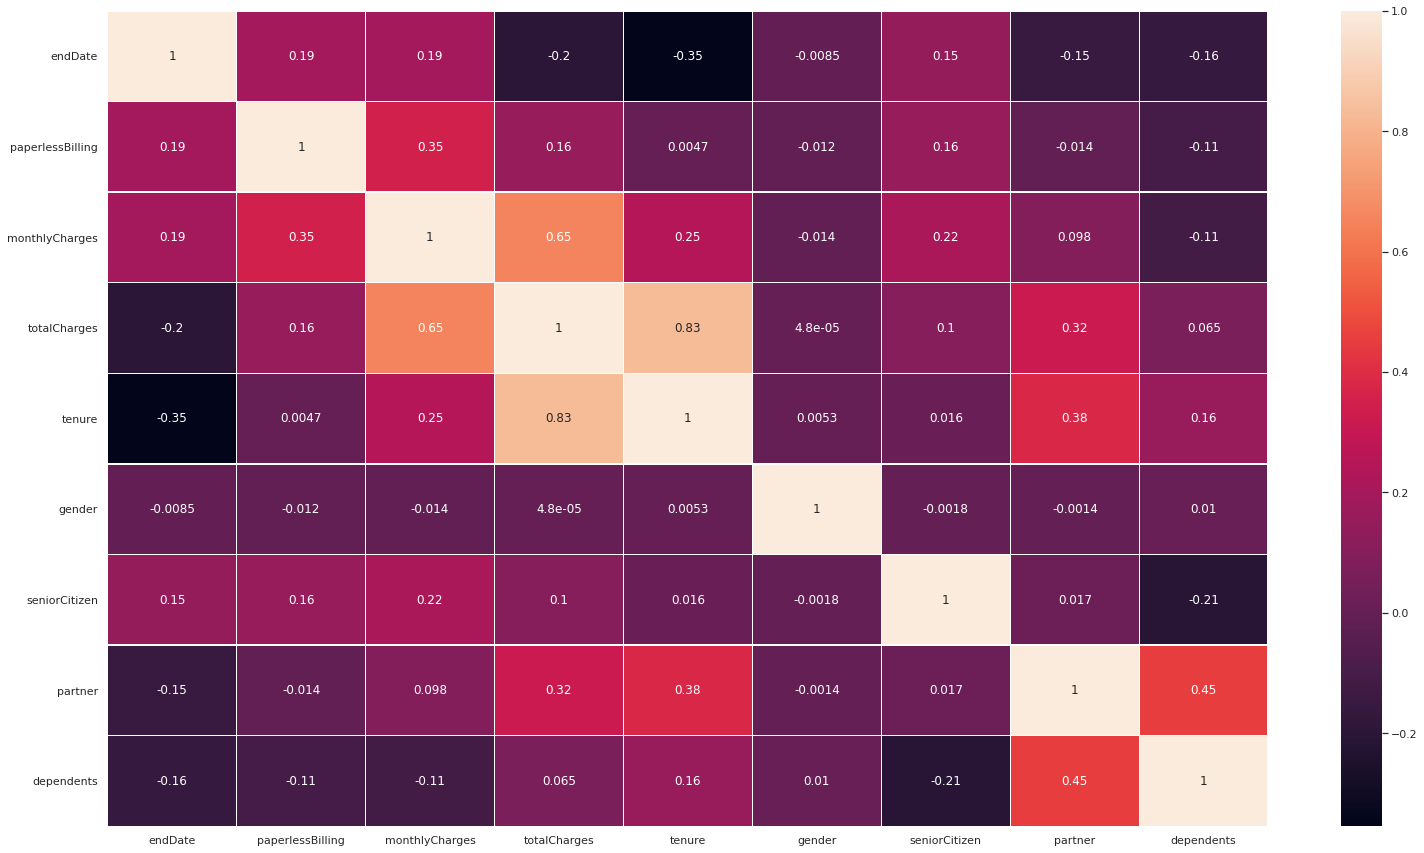

In [51]:
df_final_numerical = df_final.drop(['customerID','beginDate','type','paymentMethod'], axis=1)
corr_final = df_final_numerical.corr()
plt.figure(figsize = (26,15))
sns.heatmap(corr_final, annot=True,linewidths=.5)
plt.show()

* There is a negative correlation between tenure, total charges and churn 
* The relationship between churn and tenure period is the strongest one among the other relationships, and this justifies what we mentioned in the previous step
* The weakest correlation is between gender and churn. 
  * obviously, they are unrelatable to each other 

## Feature Engineering

### Feature importance

* Checking how much the features are important

In [52]:
df_final_no_nan = df_final.fillna(value='No service')
df_final_no_nan.drop(columns=['beginDate','customerID'],inplace=True)
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_final_no_nan.endDate)

categorical_attributes = df_final_no_nan.select_dtypes(include=[int,float,object]).drop('endDate',axis=1)


features_importance = categorical_attributes.apply(compute_mutual_information).sort_values(ascending=False)

print(features_importance)

totalCharges        0.537530
tenure              0.334372
monthlyCharges      0.173835
type                0.098182
onlineSecurity      0.064528
techSupport         0.062873
internetService     0.055394
onlineBackup        0.046659
paymentMethod       0.044423
deviceProtection    0.043784
streamingMovies     0.031918
streamingTV         0.031803
paperlessBilling    0.019119
dependents          0.014270
partner             0.011383
seniorCitizen       0.010533
multipleLines       0.000798
gender              0.000037
dtype: float64


<AxesSubplot:>

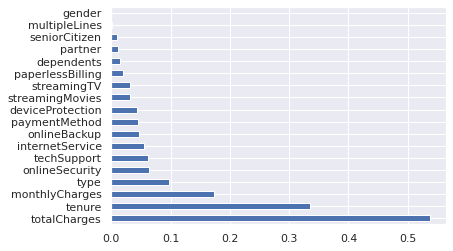

In [53]:
features_importance.plot(kind='barh')

* The most important feature is the totalCharges 
* The least important is the gender, another proof that gender is an unnecessary attribute for this analysis topic
* Most important features aare: totalCharges and tenure
* Least important features are: gender and multiple lines

### Data Encoding

**Using the One Hot Encoding in order to make the encoding for all the columns with null/'no service' values**

In [54]:
ohe_encoding = ['type','paymentMethod','internetService','onlineSecurity','onlineBackup','deviceProtection','techSupport','streamingTV','streamingMovies','multipleLines']
df_copy=pd.get_dummies(df_final[ohe_encoding],dummy_na=True,drop_first=True)
df_ohe = df_final.join(df_copy).drop(ohe_encoding, axis=1)
df_ohe.head()

,customerID,beginDate,endDate,paperlessBilling,monthlyCharges,totalCharges,tenure,gender,seniorCitizen,partner,...,deviceProtection_Yes,deviceProtection_nan,techSupport_Yes,techSupport_nan,streamingTV_Yes,streamingTV_nan,streamingMovies_Yes,streamingMovies_nan,multipleLines_Yes,multipleLines_nan
0,7590-VHVEG,2020-01-01,0,1,29.85,29.85,31.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,2017-04-01,0,0,56.95,1889.50,1036.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,2019-10-01,1,1,53.85,108.15,61.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,2016-05-01,0,0,42.30,1840.75,1371.0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,9237-HQITU,2019-09-01,1,1,70.70,151.65,61.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train / Test Split, Scaling the Data

### Splitting into sets

* customerID and the eginDate are irrelevant to the customer churn 
  * the begin date was used to calculate cutomer tenure that can be relatable to the customer churn

In [55]:
X = df_ohe.drop(['customerID','beginDate','endDate'], axis=1)
y = df_ohe['endDate']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) 

### Scaling The Data

* copying the sets in order to do the scaling step

In [57]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

**Scaling numerical features only**

In [58]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[['monthlyCharges','totalCharges','tenure']])
X_train_scaled[['monthlyCharges','totalCharges','tenure']] = scaler.transform(X_train_scaled[['monthlyCharges','totalCharges','tenure']])
X_test_scaled[['monthlyCharges','totalCharges','tenure']] = scaler.transform(X_test_scaled[['monthlyCharges','totalCharges','tenure']])

In [59]:
X_train_scaled.head()

,paperlessBilling,monthlyCharges,totalCharges,tenure,gender,seniorCitizen,partner,dependents,type_One year,type_Two year,...,deviceProtection_Yes,deviceProtection_nan,techSupport_Yes,techSupport_nan,streamingTV_Yes,streamingTV_nan,streamingMovies_Yes,streamingMovies_nan,multipleLines_Yes,multipleLines_nan
525,0,0.726368,0.544600,0.719112,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4494,0,0.657214,0.024954,0.028690,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5077,0,0.015920,0.014465,0.085609,0,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
673,1,0.065672,0.054766,0.296622,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4283,1,0.516915,0.030181,0.043036,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_test_scaled.head()

,paperlessBilling,monthlyCharges,totalCharges,tenure,gender,seniorCitizen,partner,dependents,type_One year,type_Two year,...,deviceProtection_Yes,deviceProtection_nan,techSupport_Yes,techSupport_nan,streamingTV_Yes,streamingTV_nan,streamingMovies_Yes,streamingMovies_nan,multipleLines_Yes,multipleLines_nan
3281,1,0.761692,0.539101,0.676539,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1625,1,0.572139,0.073517,0.112448,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4606,0,0.067164,0.032529,0.142064,0,0,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
5443,0,0.270647,0.140128,0.352615,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2762,0,0.806468,0.287872,0.338269,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,0


In [61]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

0    3630
1    1292
Name: endDate, dtype: int64

0    1533
1     577
Name: endDate, dtype: int64


* We mentioned on the EDA section that the targest class is imbalanced and we see that here also after the splitting step 
* We will perform downsampling to the train set and work with it on the model evaluation

In [62]:
from sklearn.utils import shuffle
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]) 
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
    
    return features_downsampled, target_downsampled



X_train_scaled, y_train = downsample(
    X_train_scaled, y_train, 0.4
)

In [63]:
y_train.value_counts()

0    1452
1    1292
Name: endDate, dtype: int64

* Now it seems to have more balance 

In [64]:
y_test.value_counts()

0    1533
1     577
Name: endDate, dtype: int64

## Evaluation Procedure

* Creating a method that take the train and test set with a model fitted on the train set 
* For each set:
  * Calculate prediction for the set and plot accuracy score graph
  * Calculate the probabilites for the set and plot ROC curve
  * Calculate accuracy score
  * Calculate AUC-ROC score

In [65]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}

    fig, axs = plt.subplots(1, 2, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # accuracy
        acc_thresholds = np.arange(0, 1.01, 0.05)
        acc_scores = [metrics.accuracy_score(target, pred_proba>=threshold) for threshold in acc_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'
            
        # Accuracy Score
        ax = axs[0]
        max_acc_score_idx = np.argmax(acc_scores)
        ax.plot(acc_thresholds, acc_scores, color=color, label=f'{type}, max={acc_scores[max_acc_score_idx]:.2f} @ {acc_thresholds[max_acc_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(acc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(acc_thresholds[closest_value_idx], acc_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('Accuracy')
        ax.legend(loc='lower center')
        ax.set_title(f'Accuracy Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
               
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'ROC AUC'))
    
    print(df_eval_stats)
    return 

## Working with models

**Using the models below**


1. Dummy model, sanity check
2. Random Forest model
3. SVC model
4. Logistic Regression model
5. Light GBM model
6. XGB model
7. CatBoost model

### The Dummy Model

          train  test
Accuracy   0.53  0.73
ROC AUC    0.50  0.50
CPU times: user 106 ms, sys: 0 ns, total: 106 ms
Wall time: 119 ms


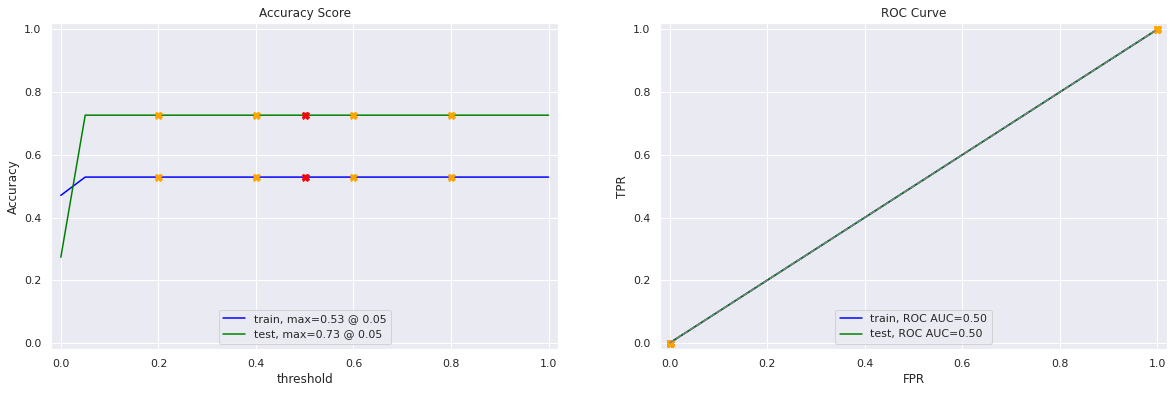

In [66]:
%%time
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled,y_train)
evaluate_model(dummy_clf , X_train_scaled, y_train, X_test_scaled, y_test)

* Accuracy score for the test set is good
* accuracy curves are static from 0.05 and above 

### The Random Forest Model

          train  test
Accuracy   0.97  0.74
ROC AUC    0.99  0.79
CPU times: user 155 ms, sys: 8.19 ms, total: 164 ms
Wall time: 177 ms


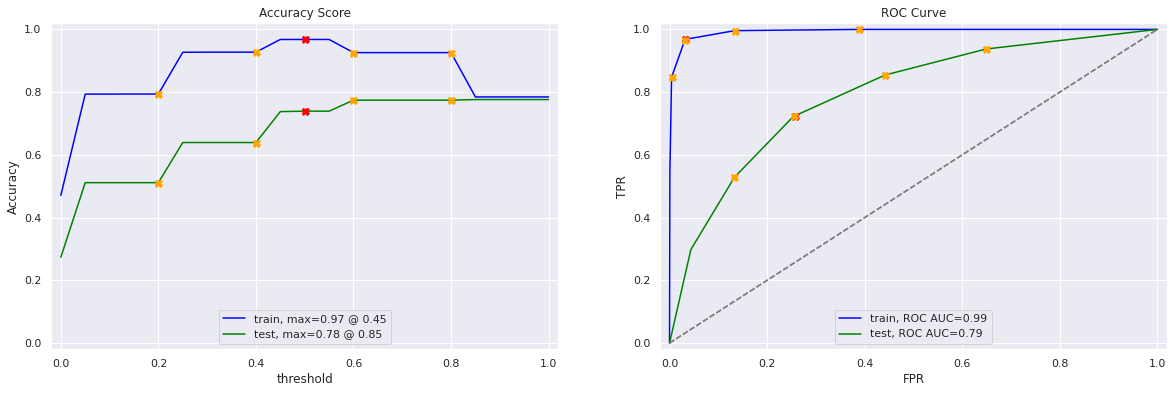

In [67]:
%%time
model_2 = RandomForestClassifier(n_estimators=5,random_state=52)
model_2.fit(X_train_scaled, y_train)
evaluate_model(model_2,X_train_scaled, y_train, X_test_scaled, y_test)

* There is a gap between the results of the different sets 
* Train results are significantly high

### The SVC model

          train  test
Accuracy   0.76  0.73
ROC AUC    0.83  0.82
CPU times: user 4.81 s, sys: 17.1 ms, total: 4.83 s
Wall time: 4.94 s


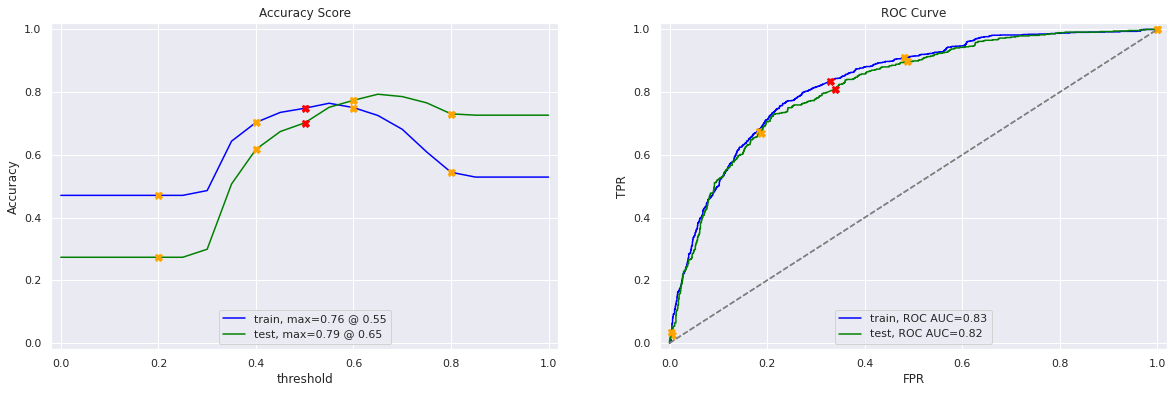

In [68]:
%%time
from sklearn import svm
model_3 = svm.SVC(C = 0.01,kernel='rbf',max_iter=1000,probability=True)
model_3.fit(X_train_scaled, y_train)
evaluate_model(model_3,X_train_scaled, y_train, X_test_scaled, y_test)

* Score results of the different set are similar to each other 
* From the accuracy graph we see that the sets behave the same in terms of increasing and decreasing at the same threshold values, from 0.58 test set accuracy get higher than this of the train set
* ROC curve are very similar for both of the sets

### The Logistic Regression model

          train  test
Accuracy   0.77  0.76
ROC AUC    0.85  0.85
CPU times: user 296 ms, sys: 147 ms, total: 443 ms
Wall time: 453 ms


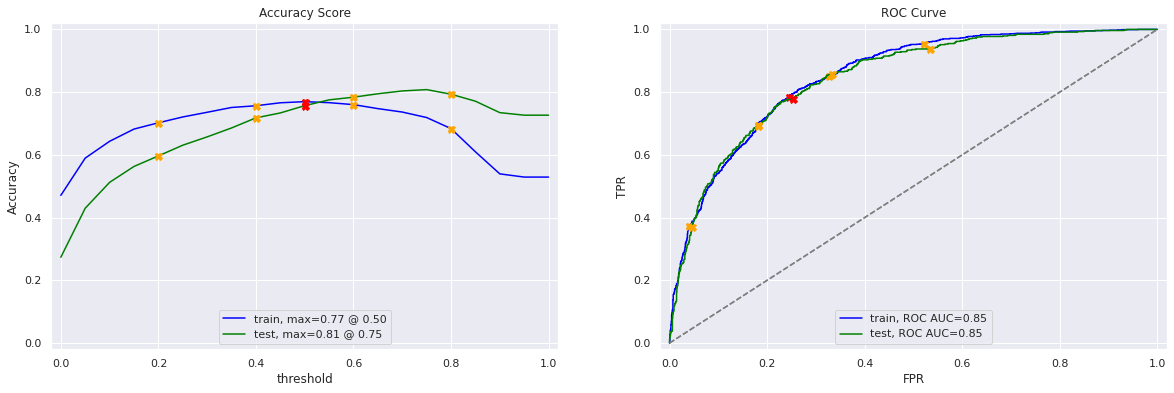

In [69]:
%%time
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression(solver='liblinear', random_state=43,C=1000)
logreg.fit(X_train_scaled, y_train)
evaluate_model(logreg,X_train_scaled, y_train, X_test_scaled, y_test)

* The score results of the train and th test set are very close to each other 
* The ROC curve intersect with each other along the whole FPR 

### The Light GBM

          train  test
Accuracy   0.93  0.80
ROC AUC    0.98  0.89
CPU times: user 13.6 s, sys: 176 ms, total: 13.8 s
Wall time: 14 s


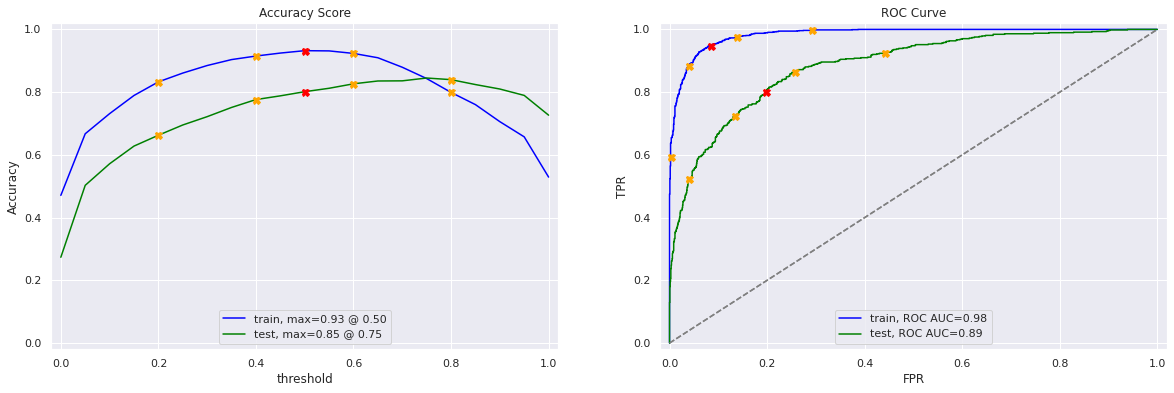

In [70]:
%%time
model_4 = LGBMClassifier(random_seed=12345,n_estimators=1000,learning_rate = 0.01)
model_4.fit(X_train_scaled, y_train)
evaluate_model(model_4, X_train_scaled, y_train, X_test_scaled, y_test)

* High Accuracy and AUC ROC score for both of the sets
* The score of the train set is higher than those of the test set and that is reasonable
* Great AUC-ROC score for the test set = 0.89
* The curve of the train set was higher up to threshold of 0.77, from 0.77 the test curve beats it until treshold of 1

### XGB Model

In [71]:
params = [{'max_depth':[1,2,3,4,5],
         'n_estimators': [500,1000]}]
gs_xgb = XGBClassifier(eval_metric='mlogloss',
                        min_child_weight=1,
                        learning_rate =0.05,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=1,
                        scale_pos_weight=1,
                        random_state=43)

gs_xgb= GridSearchCV(gs_xgb, 
                     param_grid=params, 
                     scoring='roc_auc')

gs_xgb.fit(X_train_scaled, y_train)
print(gs_xgb.best_params_)

# find best model score
gs_xgb.score(X_test_scaled, y_test)

{'max_depth': 2, 'n_estimators': 1000}


0.891657368058688

          train  test
Accuracy   0.86  0.80
ROC AUC    0.93  0.89
CPU times: user 4.99 s, sys: 35.9 ms, total: 5.03 s
Wall time: 5.04 s


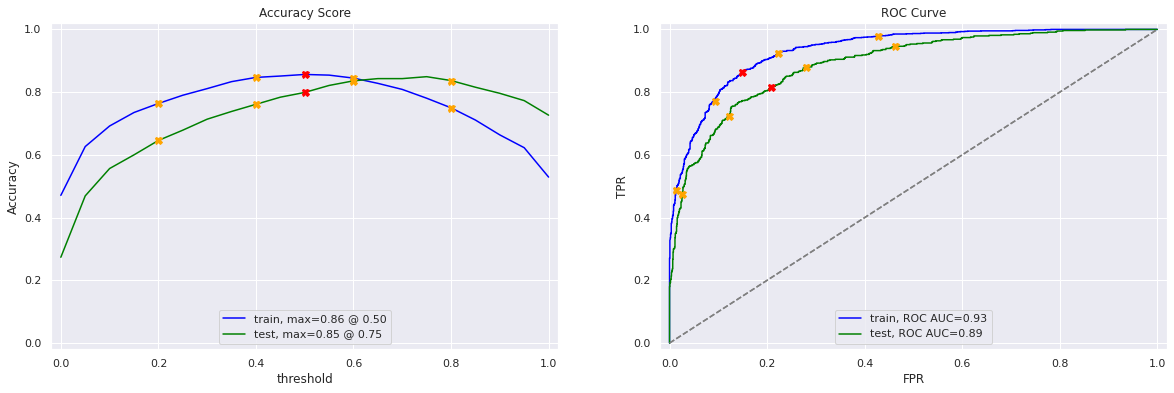

In [72]:
%%time
model_5 = XGBClassifier(max_depth=2,n_estimators=1000,eval_metric='mlogloss',
                        min_child_weight=1,
                        learning_rate =0.05,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=1,
                        scale_pos_weight=1,
                        random_state=43)
model_5.fit(X_train_scaled, y_train)
evaluate_model(model_5, X_train_scaled, y_train, X_test_scaled, y_test)

* For this model, we got very high accuracy score and AUC ROC score
* the Accuracy score curve behave the same way in terms of increase decrease, from threshold of 0.6 the accuracy gets higher

### CatBoost Model

In [73]:
params = [{'learning_rate':[0.01, 0.02, 0.05],
         'iterations': [100,500]}]
cbt_clf = CatBoostClassifier(random_seed=42,silent=True)
gs_ctb = GridSearchCV(cbt_clf,
                      param_grid=params,
                      scoring='roc_auc')
gs_ctb.fit(X_train_scaled, y_train)
print(gs_ctb.best_params_)

# find best model score
gs_ctb.score(X_test_scaled, y_test)

{'iterations': 500, 'learning_rate': 0.05}


0.8932248476893665

          train  test
Accuracy   0.93  0.81
ROC AUC    0.98  0.89
CPU times: user 1.8 s, sys: 68.5 ms, total: 1.87 s
Wall time: 2.83 s


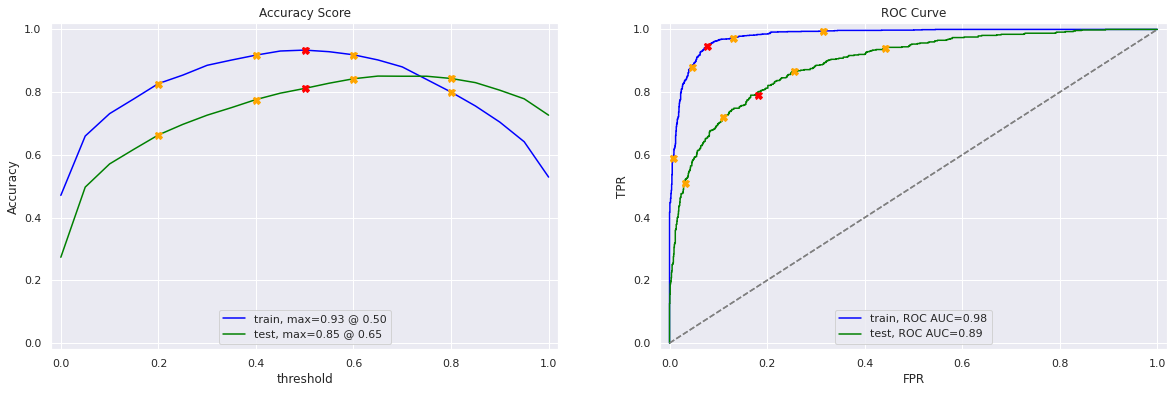

In [74]:
%%time
model_6 = CatBoostClassifier(random_seed=42,silent=True,iterations= 500,learning_rate=0.05)
model_6.fit(X_train_scaled, y_train)
evaluate_model(model_6, X_train_scaled, y_train, X_test_scaled, y_test)

* The same here for this model
* For this model, we got very high accuracy score and AUC ROC score
* the Accuracy score curve behave the same way in terms of increase decrease, from threshold of 0.65 the accuracy gets higher
* Total time is very fast

###  Conclusion - Best Model

* From what we saw above the best performing model is CatBoost:
   1. it runs very fast
   2. returned the highest accuracy score and AUC ROC score 

## Conclusions

* In the first stage, we load all of the initial libraries and imports

* In the second stage, we load the data and get overlook of the data:
  * we observed the size of each dataset 
  * for each dataset we observed the data types
  * we found that there are no null values in any dataset 
* In the data preprocessing stage:
   * We change all the names of the columns, so that each attribute it's first letter is a lower case and that is for convenience purposes only
   * We observed the data types and data values for each attribute on each table
   
   * Contract dataframe
     * from the beginDate and a
   * Personal dataframe
  
  
* In the EDA stage, we found:
  * The ratio of cutomers who did not churn is significantly higher than those who did churn, indicates that the class is imbalanced
  * that the gender does not have effect on customer churn
  * Senior citizen churn ratio is almost three times larger than this of the young ones
  * Multiple lines service does not have effect on cutomer churn 
  * Customer with the DSL service churn ratio is signficantly lower than those with the Fiber optics
  * We can see that as the total charges increase the number of customer who stayed in the company are decreasing
  * that as the tenure period is longer the churn ratio drops, the opposite is true
  * Data correlation:
    * The strongest correlation is between tenure and churn
    * The weakest correlation is between gender and churn

* In the Feature engineering stage:
  * Use OHE to encode the categorical features/attributes
  * Observed the feature importance, found: 
    * Most important features aare: totalCharges and tenure
    * Least important features are: gender and multiple lines

* In the splitting data stage:
  * Split the data into features and target
  * Split features and target into train and test set 
  * Scale the data using the min max scaler
  * We observed the class imbalance of the target, did a downsampling for the train set
 
* In the Evaluation procedure: create a method to return the accuracy and AUC ROC scores, plot graphs as well 

* In the stage of working with model we found:
  * The best model is the cat boost: got the highest accuracy and AUC ROC scores, take the least time
  * Ranking the models: 
    1. CatBoost 
    2. XGB 
    3. LightGBM 
    4. Logistic Regression
    5. SVC model
    6. Random Forest